
# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

## Theoretical Background

PCA involves the following steps:

1. **Standardize the Data**: Center the data by subtracting the mean of each feature and scale to unit variance.
2. **Covariance Matrix**: Compute the covariance matrix of the standardized data.
3. **Eigenvalues and Eigenvectors**: Calculate the eigenvalues and eigenvectors of the covariance matrix.
4. **Principal Components**: Sort the eigenvectors by decreasing eigenvalues and select the top k eigenvectors.
5. **Transform Data**: Project the original data onto the selected eigenvectors to get the principal components.

Mathematically, PCA can be represented as:

$$
 X_{new} = X \cdot W 
$$

where X is the original data, W is the matrix of selected eigenvectors, and X_new is the transformed data.



## Hands-on Example

Let's walk through a hands-on example using Python and the scikit-learn library.


In [1]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris




### Step 1: Load and Standardize the Data

We will use the Iris dataset for this example.


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Convert to DataFrame for easier handling
df = pd.DataFrame(X_std, columns=feature_names)
df['target'] = y




### Step 2: Covariance Matrix and Eigenvalues

Compute the covariance matrix and find the eigenvalues and eigenvectors.


In [3]:
# Compute the covariance matrix
cov_matrix = np.cov(X_std.T)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and corresponding eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)



Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]



### Step 3: PCA with Scikit-learn

Perform PCA using the scikit-learn library and transform the data.


In [4]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)



Explained variance ratio: [0.72962445 0.22850762]



### Step 4: Visualize the Result

Visualize the first two principal components.


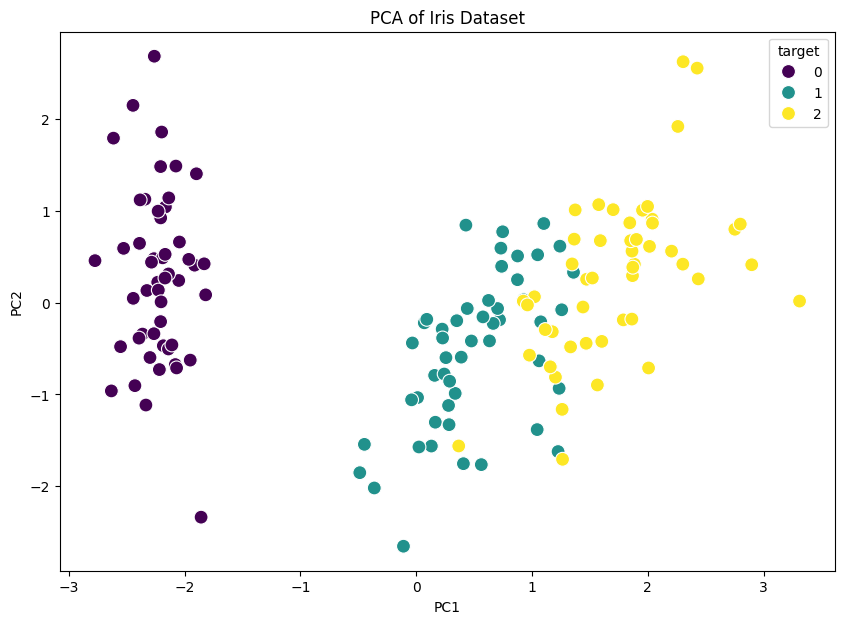

In [5]:
# Plot the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis', s=100)
plt.title('PCA of Iris Dataset')
plt.show()



## Pros and Cons of PCA

### Advantages of PCA

- **Dimensionality Reduction**:
  - PCA reduces the number of features in a dataset while retaining most of the variance (information), making it easier to visualize and analyze high-dimensional data.
  - It helps in reducing computational costs, as fewer dimensions mean less computation in subsequent analyses or model training.

- **Noise Reduction**:
  - By focusing on the principal components that capture the most variance, PCA can filter out noise and irrelevant features, which improves the performance of machine learning models.

- **Feature Extraction**:
  - PCA generates new features (principal components) that are linear combinations of the original features. These new features can sometimes reveal patterns that were not apparent in the original data.

- **Improved Model Performance**:
  - Reducing the number of features can help mitigate the risk of overfitting, especially in scenarios with small sample sizes relative to the number of features.
  - PCA can improve the accuracy and generalization of machine learning models by removing multicollinearity (highly correlated features).

- **Data Visualization**:
  - PCA is often used to reduce data to two or three dimensions, making it easier to visualize complex, high-dimensional datasets and identify patterns or clusters.

- **Uncorrelated Features**:
  - The principal components generated by PCA are uncorrelated, which can be beneficial for some machine learning algorithms that assume feature independence.

### Disadvantages of PCA

- **Loss of Interpretability**:
  - The new features (principal components) created by PCA are linear combinations of the original features, making them difficult to interpret in the context of the original variables.
  - It can be challenging to explain the results to stakeholders who may not understand the underlying transformations.

- **Assumption of Linearity**:
  - PCA assumes that the relationships between features are linear. It may not capture complex, nonlinear relationships in the data, which can limit its effectiveness in some cases.

- **Sensitivity to Scaling**:
  - PCA is sensitive to the scale of the data. If the features have different units or ranges, they need to be standardized before applying PCA. Failure to do so can lead to misleading results.

- **Information Loss**:
  - While PCA aims to retain as much variance as possible, some information is inevitably lost when reducing the dimensionality. If too few principal components are selected, important information may be discarded.

- **Not Suitable for Categorical Data**:
  - PCA is primarily designed for continuous numerical data. Applying PCA to datasets with categorical features can be problematic unless those features are properly encoded.

- **Computationally Intensive**:
  - For very large datasets, especially those with a high number of features, PCA can be computationally expensive, as it requires the computation of covariance matrices and eigenvectors.

- **Assumes Mean-Centered Data**:
  - PCA assumes that the data is centered around the origin (mean of zero). If the data is not mean-centered, the results of PCA may be inaccurate.


## Summary

**PCA helps simplify complex datasets by reducing the number of dimensions, making it easier to visualize and analyze data while retaining the most important information.**